In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [101]:
ETA = 100
STEP = 30
datasets = [file for file in os.listdir("../../datasets/synthetic/") if "csv" in file]

model = 'RandomForestClassifier'
dataset = 'sine_unbalanced.csv'

filename_mtl = f'../metabases/basemodel: {model} - dataset: {dataset} - with_drift_metrics.csv'
results = pd.read_csv(filename_mtl)
results['original_idx'].unique()

array(['0:100', '30:130', '60:160', '90:190', '120:220', '150:250',
       '180:280', '210:310', '240:340', '270:370', '300:400', '330:430',
       '360:460', '390:490', '430:530', '460:560', '490:590', '520:620',
       '550:650', '580:680', '610:710', '640:740', '670:770', '700:800',
       '730:830', '760:860', '790:890', '820:920', '850:950', '880:980',
       '910:1010', '940:1040', '970:1070', '1000:1100', '1030:1130',
       '1060:1160', '1090:1190', '1120:1220', '1150:1250', '1180:1280',
       '1210:1310', '1240:1340', '1270:1370', '1300:1400', '1330:1430',
       '1360:1460', '1390:1490', '1420:1520', '1450:1550', '1480:1580',
       '1510:1610', '1540:1640', '1570:1670', '1600:1700', '1630:1730',
       '1660:1760', '1690:1790', '1720:1820', '1750:1850', '1780:1880',
       '1810:1910', '1840:1940', '1870:1970', '1900:2000', '1930:2030',
       '1960:2060', '1990:2090', '2020:2120', '2050:2150', '2080:2180',
       '2110:2210', '2140:2240', '2170:2270', '2200:2300', '2230:23

In [123]:
def get_concept(original_idx: pd.Series, dataset: str):
    filename_concept = f'../../datasets/synthetic/{dataset}'
    df_concept = pd.read_csv(filename_concept)['concept']

    concepts = []
    for idx in original_idx:
        bounds = [int(bound) for bound in idx.split(':')]
        concept_batch = df_concept[bounds[0]:bounds[1]]
        most_frequent_concept = concept_batch.value_counts().idxmax()
        print(most_frequent_concept)
        concepts.append(most_frequent_concept)
    return concepts

In [69]:
def load_data(dataset, model):
    filename_mtl = f'../metabases/basemodel: {model} - dataset: {dataset} - with_drift_metrics.csv'
    results = pd.read_csv(filename_mtl)
    concept = get_concept(results['original_idx'], dataset)
    results['concept'] = concept
    return results

def plot_data(model):
    _, axs = plt.subplots(len(datasets), 4, figsize=(20, 3*len(datasets)))
    for row, dataset in enumerate(datasets):
        df = load_data(dataset, model)
        for col, metric in enumerate(["kappa", "precision", "recall", "f1-score"]):
            ax = axs[row, col]
            df.plot(y=[metric, f'predicted_{metric}'], ax=ax, title=dataset[-4])

430


ValueError: Length of values (430) does not match length of index (347)

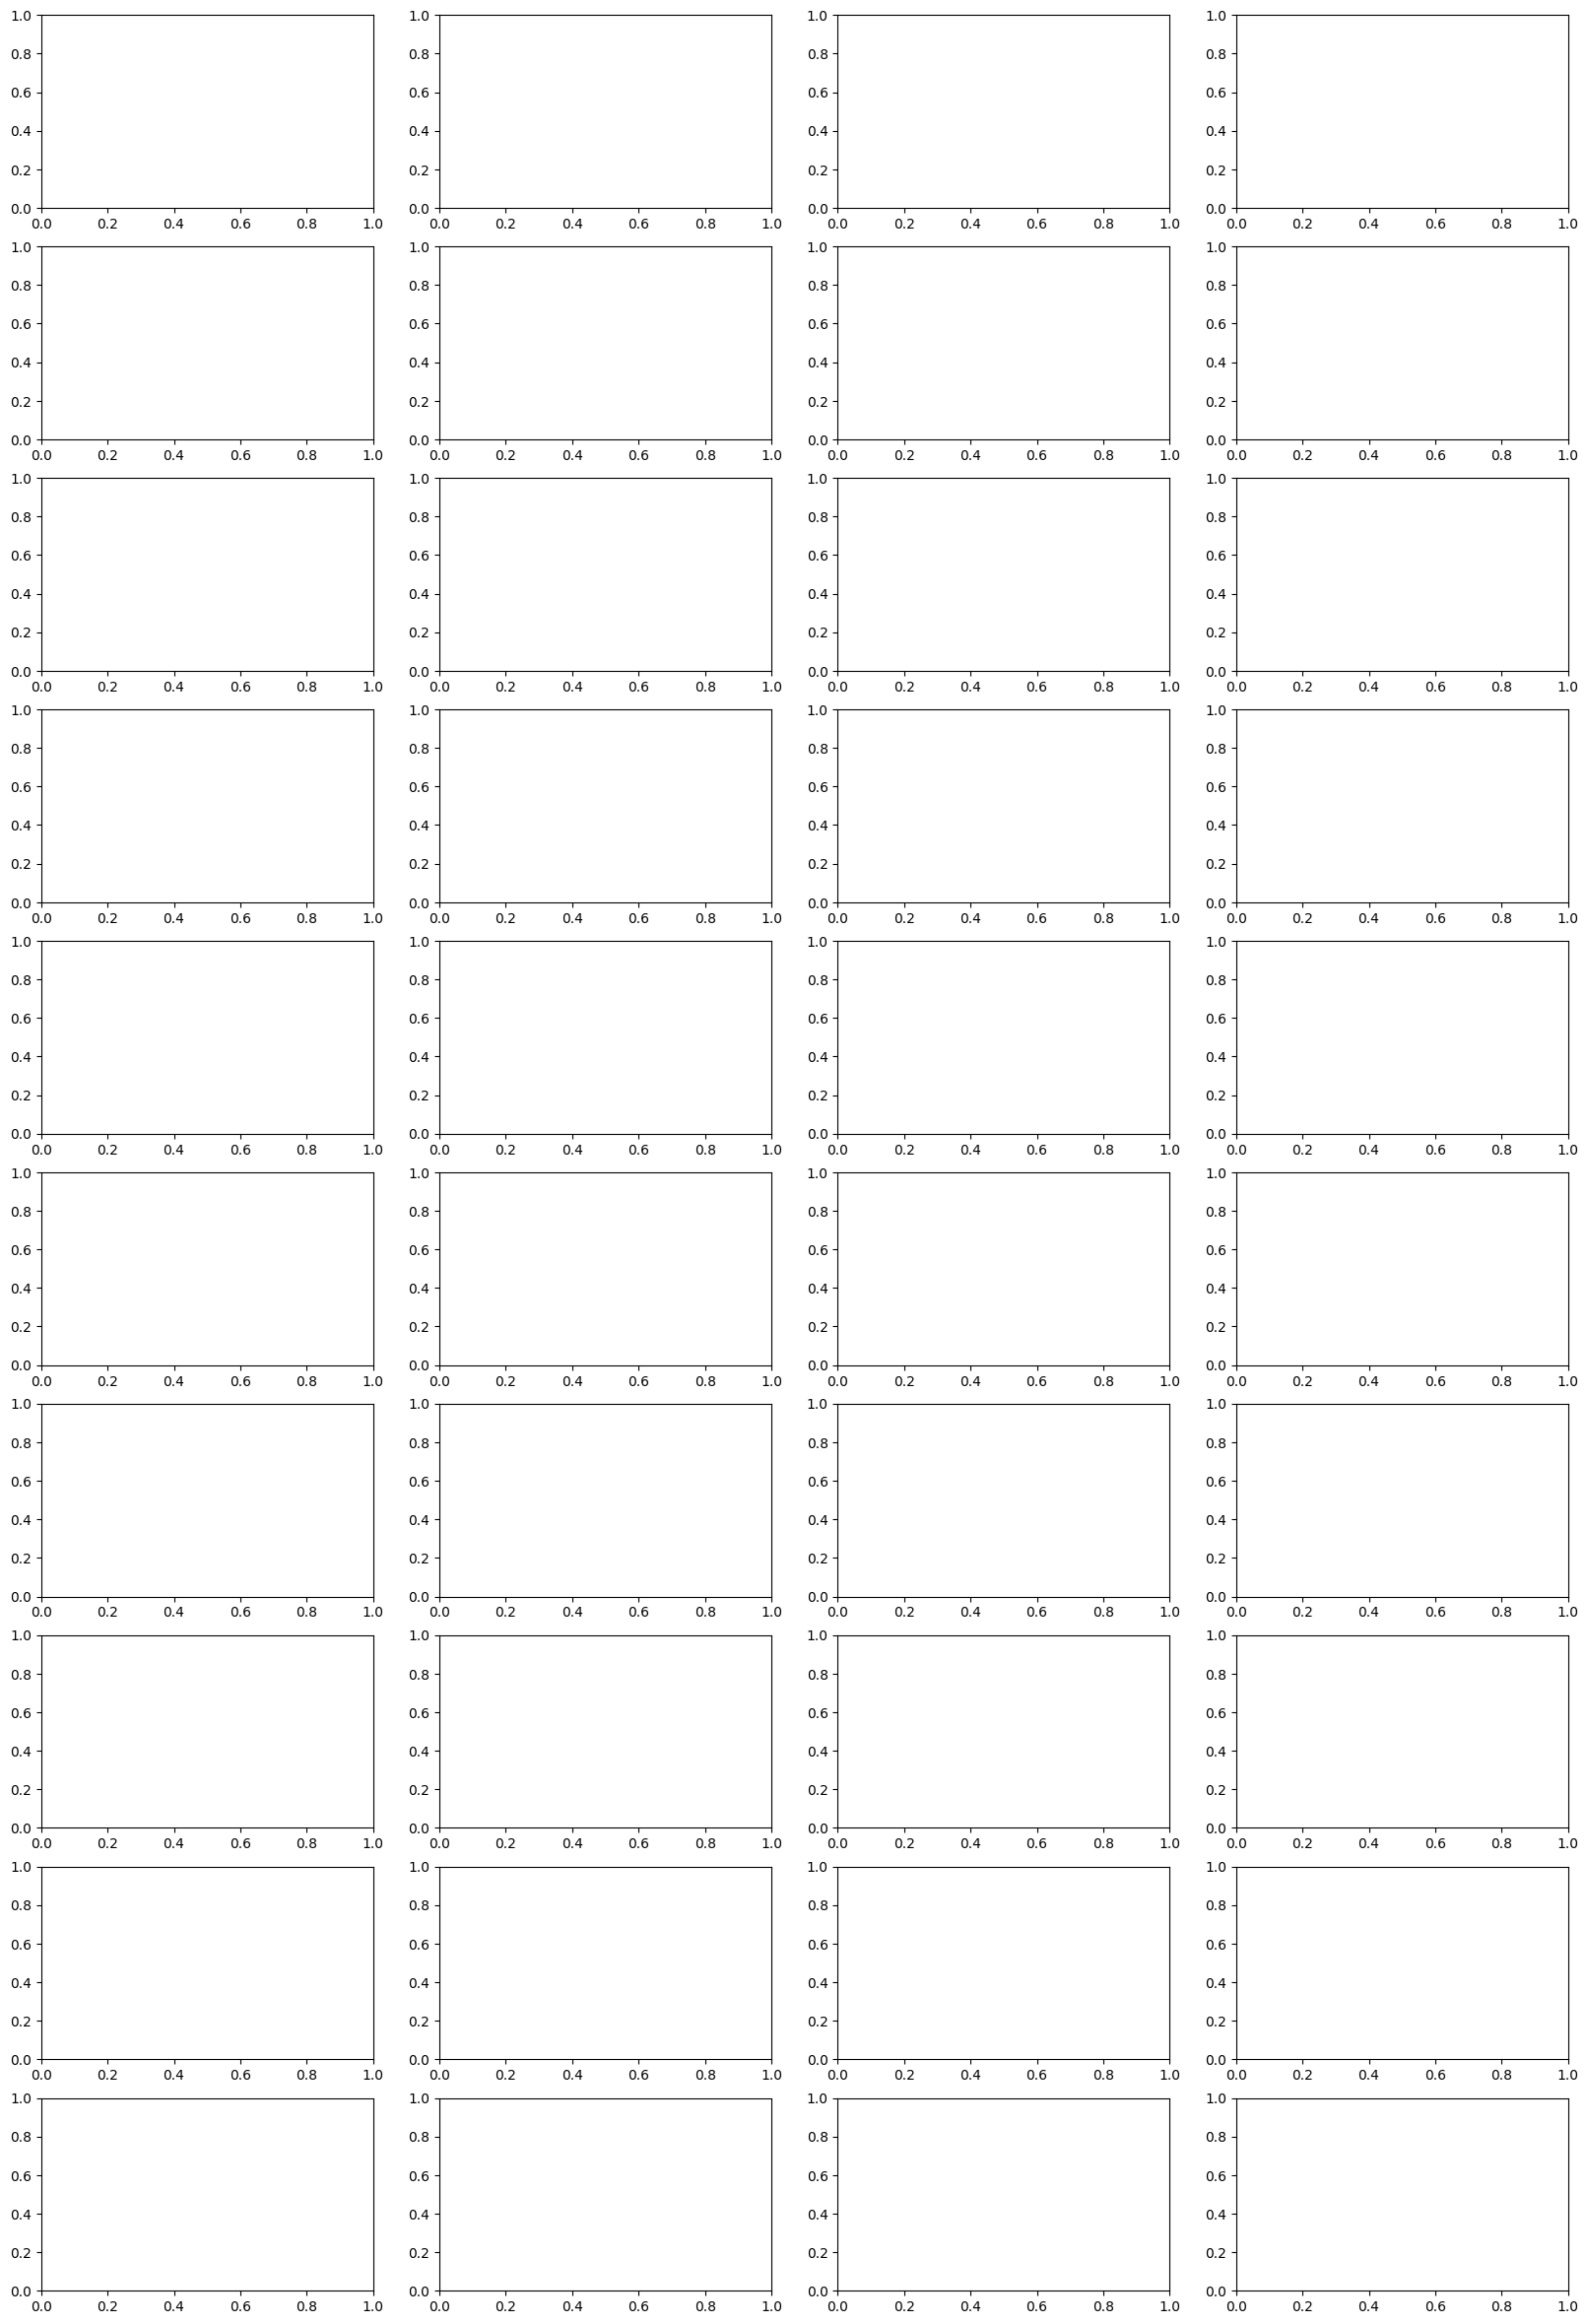

In [70]:
plot_data('DecisionTreeClassifier')

In [ ]:
plot_data('LogisticRegression')

In [ ]:
plot_data('SVC')

FileNotFoundError: [Errno 2] No such file or directory: '../metabases/basemodel: RandomForest - dataset: sine_unbalanced.csv - with_drift_metrics.csv'

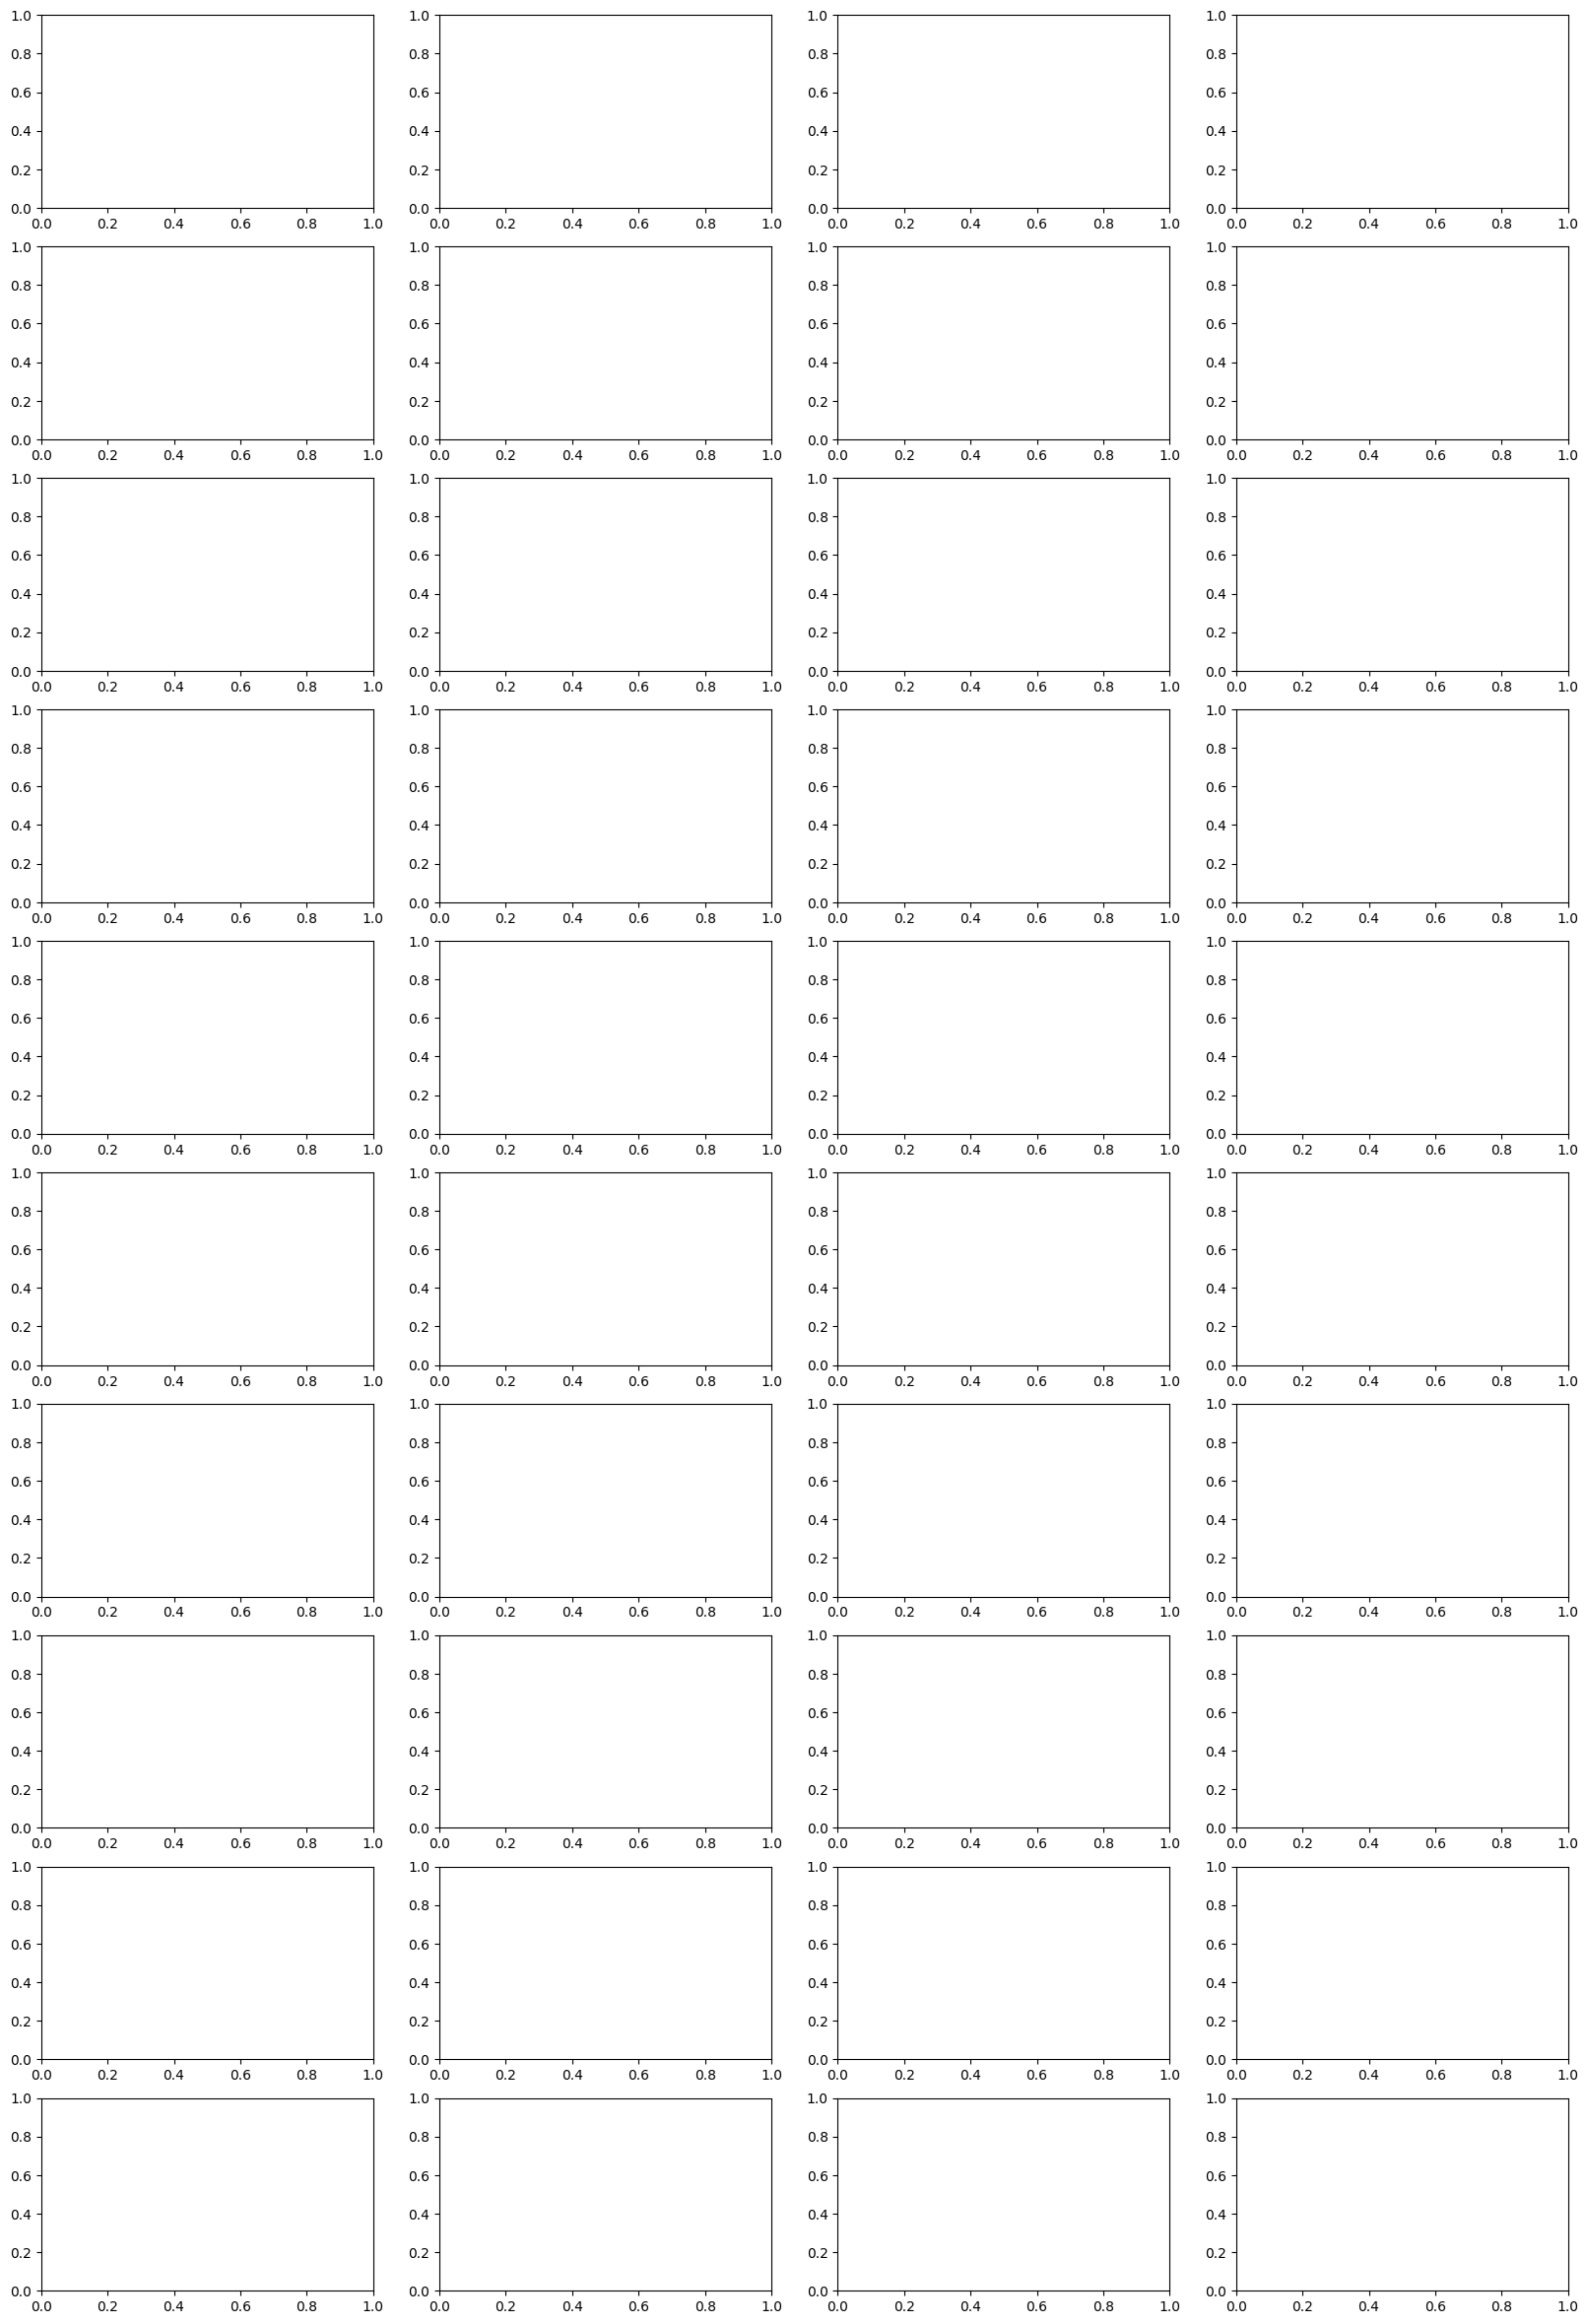

In [36]:
plot_data('RandomForestClassifier')

In [71]:
df.drop(None, axis=1)

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [80]:
results['psi_0'].iloc[10]

0.1323659197853612

In [87]:
# for i, row in results.iterrows():
#     print(row)

row.name

346